Assignment 4\
Khalid Saifullah\
ID: A20423546\
\
Solution to Question 1(i)

In [1]:
# Importing all the libraries
import sys
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import optimizers
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.vgg16 import VGG16

import random
random.seed(0)

In [2]:
# preparing the training and validation dataset
def prepare_data():
    # creating the data generator
    train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # preparing the iterators
    train_gen = train_datagen.flow_from_directory('Dataset/train/', class_mode='binary', batch_size=60, target_size=(200, 200))
    validation_gen = datagen.flow_from_directory('Dataset/validation/', class_mode='binary', batch_size=60, target_size=(200, 200))
    test_gen = datagen.flow_from_directory('Dataset/test/', class_mode='binary', batch_size=60, target_size=(200, 200))
    return train_gen, validation_gen, test_gen

# defining the CNN model
def define_model():
    # loading the model
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
    model = models.Sequential()
    model.add(conv_base)
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
    # model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    # marking the loaded layers as not trainable
    print('No of weight tensors before freezing the conv_base = ' + str(len(model.trainable_weights)))
    conv_base.trainable = False
    print('No of weight tensors after freezing the conv_base = ' + str(len(model.trainable_weights)))
    # compiling the model
    model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plotting the learning curves
def learning_curves(history):
    # plotting the loss
    print(history.history.keys())
    epochs = range(1, len(history.history['accuracy'])+1)
    plt.figure(figsize=(10,12), facecolor='w')
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
    plt.legend()
    # plotting the accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
    plt.legend()
    # saving the plot file
    plt.show()
    plt.savefig('diagnostic_plot.png')
    plt.close()

# defining the run_model
def run_model():
    # defining the model
    model = define_model()
    # loading the prepared data
    train_generator, validation_generator, test_generator = prepare_data()
    # fitting the model
    history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator), validation_data=validation_generator, validation_steps=len(validation_generator), epochs=15, verbose=0)
    # learning curves
    learning_curves(history)
    model.save('cats&dogs_VGG16_frozen_augment.h5')



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               9437696   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 24,152,897
Trainable params: 24,152,897
Non-trainable params: 0
_________________________________________________________________
No of weight tensors before freezing the conv_base = 30
No of weight tensors after freezing the conv_base = 4
Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


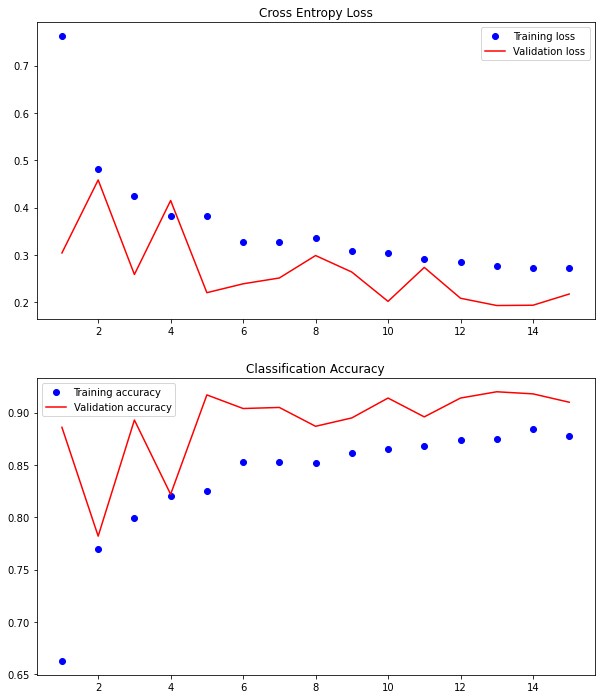

In [3]:
# Running the model
run_model()

In [4]:
# Evaluating the final model on the test set
train_generator, validation_generator, test_generator = prepare_data()
model = load_model('cats&dogs_VGG16_frozen_augment.h5')
# evaluating the model
_, acc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print('>> %.3f' % (acc * 100.0))

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/opt/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to

>> 92.350
